In [1]:
import pandas as pd
import timesynth as ts
import matplotlib.pyplot as plt
import scipy.fftpack
import numpy as np

### Trying to predict the seasonality of Indian temperature data since 1901.

In [2]:
temp = pd.read_csv('D:\PGDBA\Assignments_Projects\IMD data\TemperatureMax1.csv')

In [3]:
temp = temp.set_index('Year')

In [4]:
temp['Temperature_in_Degrees'].values[:576]

array([22.4 , 24.14, 29.07, 31.91, 33.41, 33.18, 31.21, 30.39, 30.47,
       29.97, 27.31, 24.49, 24.93, 26.58, 29.77, 31.78, 33.73, 32.91,
       30.92, 30.73, 29.8 , 29.12, 26.31, 24.04, 23.44, 25.03, 27.83,
       31.39, 32.91, 33.  , 31.34, 29.98, 29.85, 29.04, 26.08, 23.65,
       22.5 , 24.73, 28.21, 32.02, 32.64, 32.07, 30.36, 30.09, 30.04,
       29.2 , 26.36, 23.63, 22.  , 22.83, 26.68, 30.01, 33.32, 33.25,
       31.44, 30.68, 30.12, 30.67, 27.52, 23.82, 22.28, 23.69, 27.31,
       31.93, 34.11, 32.19, 31.01, 30.3 , 29.92, 29.55, 27.6 , 24.72,
       24.46, 24.01, 27.04, 31.79, 32.68, 31.92, 31.05, 29.58, 30.67,
       29.87, 27.78, 24.44, 23.57, 25.26, 28.86, 32.42, 33.02, 33.12,
       30.61, 29.55, 29.59, 29.35, 26.88, 23.73, 22.67, 24.36, 29.22,
       30.79, 33.06, 31.7 , 29.81, 29.81, 30.06, 29.25, 27.69, 23.69,
       23.24, 25.16, 28.48, 31.42, 33.51, 31.84, 30.42, 29.86, 29.82,
       28.91, 26.32, 23.37, 23.22, 24.58, 27.04, 31.27, 33.78, 32.23,
       31.44, 30.8 ,

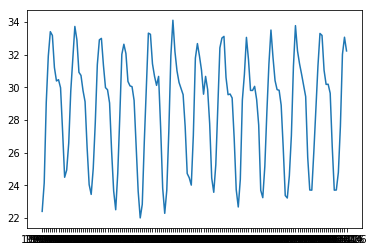

In [5]:
plt.plot(temp.index[:150], temp['Temperature_in_Degrees'][:150])
plt.show()

(-5, 10000)

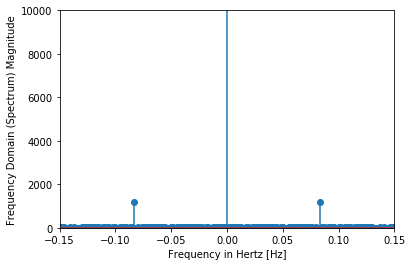

In [6]:
tempy = scipy.fftpack.fft(temp['Temperature_in_Degrees'].values[:576])
freqs = scipy.fftpack.fftfreq(len(tempy),1) # t[1] - t[0])

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(tempy))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-0.3 / 2, 0.3 / 2)
ax.set_ylim(-5, 10000)

In [7]:
pd.DataFrame(abs(tempy))

,0
0,16594.280000
1,39.297714
2,25.762071
3,19.324019
4,20.303712
5,23.250636
6,21.851866
7,35.359134
8,8.246736
9,7.687564


In [8]:
kk = pd.DataFrame(columns = ['y', 'freq'])
kk['y'] = abs(tempy)
kk['freq'] = freqs

#### As the timeseries has a very small trend, the zeroth value (highest power value) will have a frequency of 0 Hz.

#### Thus, the seasonality of the Indian temperature cycle captured through this method is 12.

In [9]:
1/abs(kk.sort_values(by='y', ascending=False).iloc[1].values[1])

12.0

### Trying to test this method on reproduced timeseries.

#### Initialising a time series to reproduce a seasonality of 6 months and finding the same through FFT.

In [10]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=576)
# Sampling irregular time samples
regular_time_samples = time_sampler.sample_regular_time(num_points=576) #,resolution=0.001736) #, keep_percentage=50) , resolution=100, num_points=1000)
# Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.166)
# Initializing Gaussian noise
white_noise = ts.noise.GaussianNoise(std=0.09)
# Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)
# Sampling using the irregular time samples
samples, signals, errors = timeseries.sample(regular_time_samples)

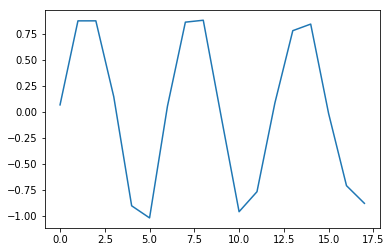

In [11]:
plt.plot(samples[:18])
plt.show()

(-5, 10)

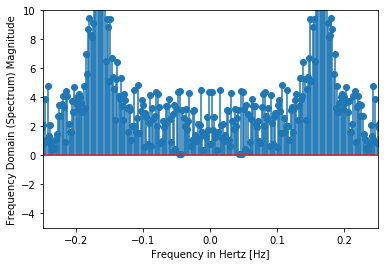

In [12]:
#Y    = np.fft.fft(samples)
y = scipy.fftpack.fft(samples)
freqs = scipy.fftpack.fftfreq(len(y)) #* 576

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(y))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-5, 10)

# plt.figure()
# plt.plot( freq, np.abs(Y) )
# plt.figure()
# plt.plot(freq,  np.angle(Y) )
# plt.show()

In [13]:
power_freq_dataframe = pd.DataFrame(columns=['power', 'frequency'])

In [14]:
power_freq_dataframe['power'] = abs(y)
power_freq_dataframe['frequency'] = freqs

In [15]:
power_freq_dataframe.sort_values(by='power', ascending=False)

,power,frequency
96,266.393101,0.166667
480,266.393101,-0.166667
481,72.752159,-0.164931
95,72.752159,0.164931
479,45.756983,-0.168403
97,45.756983,0.168403
482,33.104331,-0.163194
94,33.104331,0.163194
478,27.969903,-0.170139
98,27.969903,0.170139


In [16]:
1/abs(power_freq_dataframe.sort_values(by='power', ascending=False).iloc[0].values[1])

6.0

#### Initialising a time series with various standard deviations to reproduce a seasonality of 6 months and finding the same through FFT.

In [17]:
# Initializing TimeSeries
time_sampler = ts.TimeSampler(stop_time=576)
# Sampling regular time samples
regular_time_samples = time_sampler.sample_regular_time(num_points=1728) #,resolution=0.001736) #, keep_percentage=50) , resolution=100, num_points=1000)
# Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.166)
# Initializing Gaussian noise. This can be adjusted, however, the results are the same.
white_noise = ts.noise.GaussianNoise(std=0.9)
# Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)
# Sampling using the regular time samples
samples1, signals, errors = timeseries.sample(regular_time_samples)

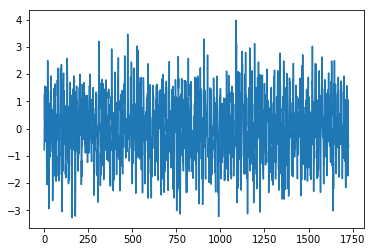

In [18]:
plt.plot(samples1[:])
plt.show()

(-5, 150)

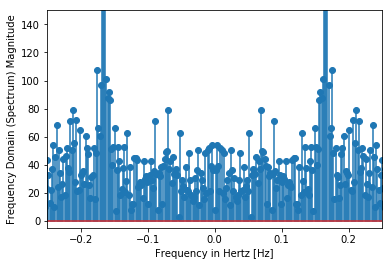

In [19]:
#Y    = np.fft.fft(samples)
y1 = scipy.fftpack.fft(samples1)
freqs1 = scipy.fftpack.fftfreq(len(y1))*3 #* 576

fig, ax = plt.subplots()

ax.stem(freqs1, np.abs(y1))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-5, 150)

# plt.figure()
# plt.plot( freq, np.abs(Y) )
# plt.figure()
# plt.plot(freq,  np.angle(Y) )
# plt.show()

In [20]:
power_freq_dataframe1 = pd.DataFrame(columns=['power1', 'frequency1'])
power_freq_dataframe1['power1'] = abs(y1)
power_freq_dataframe1['frequency1'] = freqs1

#### Thus, the seasonality comes out to be 6 through this method.

In [21]:
1/abs(power_freq_dataframe1.sort_values(by='power1', ascending=False).iloc[0].values[1])

6.0